<a href="https://colab.research.google.com/github/swarathesh/COVID_CSGAN_WEBAPP/blob/master/covid_19_classifier_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19 Classifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/dataset/

/content/drive/My Drive/dataset


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

from keras.utils.vis_utils import plot_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Plot Model

In [ ]:
def plot(model,name):
  return plot_model(model, to_file=name)

# Split the Dataset 
* Train 80%
* Test 20%

In [ ]:
!pip install split-folders

In [ ]:
%cd /content/

import splitfolders 

splitfolders.ratio("/content/drive/My Drive/dataset/co/chest_xray/train", output="./output", seed=1337, ratio=(.8, .2), group_prefix=None)



Copying files: 0 files [00:00, ? files/s]

/content



Copying files: 1 files [00:00,  2.39 files/s]
Copying files: 23 files [00:00,  3.40 files/s]
Copying files: 46 files [00:00,  4.82 files/s]
Copying files: 68 files [00:00,  6.83 files/s]
Copying files: 89 files [00:00,  9.61 files/s]
Copying files: 113 files [00:00, 13.49 files/s]
Copying files: 133 files [00:01, 18.73 files/s]
Copying files: 152 files [00:01, 25.61 files/s]
Copying files: 171 files [00:01, 33.71 files/s]
Copying files: 191 files [00:01, 44.90 files/s]
Copying files: 211 files [00:01, 58.38 files/s]
Copying files: 231 files [00:01, 74.00 files/s]
Copying files: 251 files [00:01, 90.70 files/s]
Copying files: 271 files [00:01, 108.31 files/s]
Copying files: 293 files [00:01, 127.33 files/s]
Copying files: 313 files [00:05, 16.73 files/s] 
Copying files: 328 files [00:13,  4.97 files/s]
Copying files: 338 files [00:18,  3.41 files/s]
Copying files: 345 files [00:21,  2.85 files/s]
Copying files: 350 files [00:24,  2.36 files/s]
Copying files: 354 files [00:27,  2.15 fil

# Load the dataset 

In [ ]:
img_width, img_height = 150, 150

train_data_dir = '/content/output/train'
validation_data_dir = '/content/output/val'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 60
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# Data Augumentation

* Train dataset parameters

```
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
```

* Test dataset parameters



```
    rescale=1. / 255
```




In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')



Found 4172 images belonging to 2 classes.
Found 1044 images belonging to 2 classes.


# CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

# Plot Cnn model

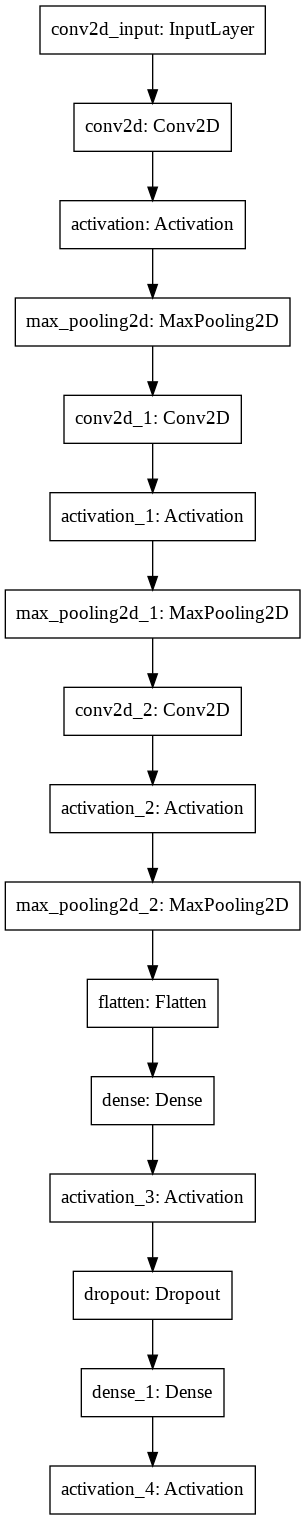

In [ ]:
plot(model,'cnn.png')

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
  )

model.save_weights('cnn.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
125/125 [==============================] - 45s 359ms/step - loss: 0.5354 - accuracy: 0.7670 - val_loss: 0.2735 - val_accuracy: 0.8918
Epoch 2/10
125/125 [==============================] - 45s 357ms/step - loss: 0.3279 - accuracy: 0.8512 - val_loss: 0.1744 - val_accuracy: 0.9310
Epoch 3/10
125/125 [==============================] - 45s 358ms/step - loss: 0.2965 - accuracy: 0.8833 - val_loss: 0.1778 - val_accuracy: 0.9330
Epoch 4/10
125/125 [==============================] - 44s 353ms/step - loss: 0.2833 - accuracy: 0.8833 - val_loss: 0.1408 - val_accuracy: 0.9502
Epoch 5/10
125/125 [==============================] - 44s 356ms/step - loss: 0.2590 - accuracy: 0.9033 - val_loss: 0.1298 - val_accuracy: 0.9531
Epoch 6/10
125/125 [==============================] - 45s 360ms/step - loss: 0.2484 - accuracy: 0.9078 - val_loss: 0.1451 - val_accuracy: 0.9435
Epoch 7/10
125/125 [==============================] - 

In [ ]:
from matplotlib import pyplot
def cm(model,history):
 scores = model.evaluate_generator(validation_generator) 
 print("Accuracy = ", scores[1])
 pyplot.plot(history.history['loss'], label='train')
 pyplot.plot(history.history['val_loss'], label='test')
 pyplot.legend()
 pyplot.show()
 predictions = model.predict_generator(validation_generator)
 predicted_classes = np.argmax(predictions, axis=1)
 true_classes = validation_generator.classes
 class_labels = list(validation_generator.class_indices.keys())  
 cm = confusion_matrix(true_classes, predicted_classes)
 df = pd.DataFrame(cm)
 plt.figure()
 sn.heatmap(df, annot=True)
 plt.show()  

Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy =  0.954023003578186


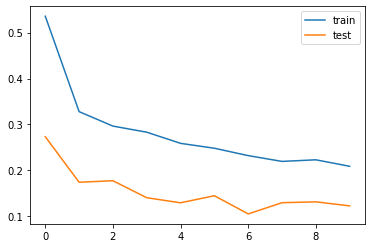

Instructions for updating:
Please use Model.predict, which supports generators.


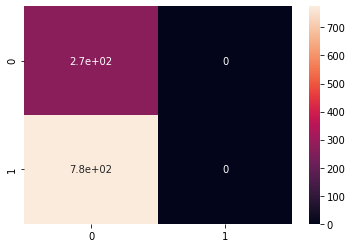

In [ ]:
cm(model,history)

# Transfer Learning 
* Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem

# Incerption V3
* Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset. The model is the culmination of many ideas developed by multiple researchers over the years. It is based on the original paper: "Rethinking the Inception Architecture for Computer Vision" by Szegedy, et. al.

* source- https://cloud.google.com/tpu/docs/inception-v3-advanced

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation_5 (Activation)       (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

# Plot inception v3 

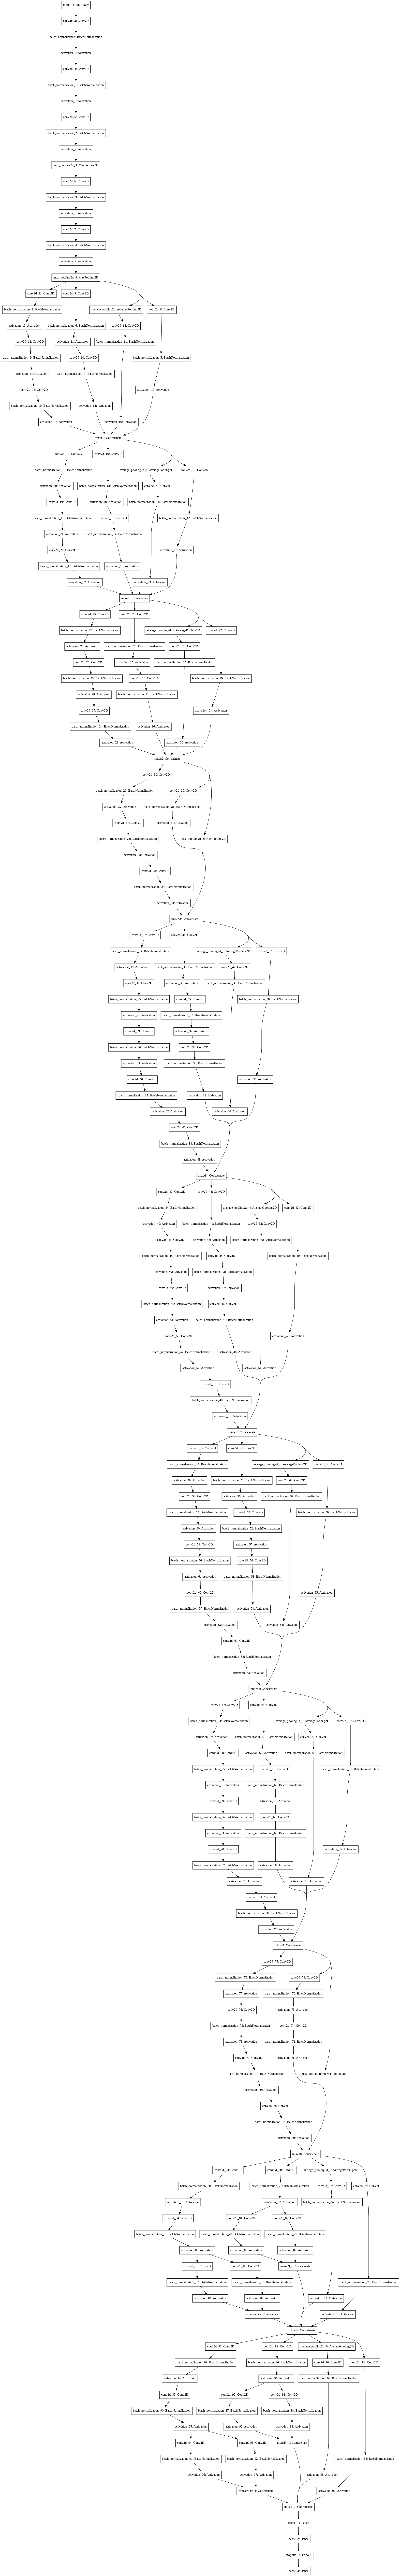

In [ ]:
plot(model,'inception.png')

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
  )

model.save_weights('inception.h5')

Epoch 1/10
125/125 [==============================] - 50s 404ms/step - loss: 1.0258 - acc: 0.8292 - val_loss: 0.2139 - val_acc: 0.9310
Epoch 2/10
125/125 [==============================] - 48s 382ms/step - loss: 0.4275 - acc: 0.8750 - val_loss: 0.2753 - val_acc: 0.9205
Epoch 3/10
125/125 [==============================] - 48s 386ms/step - loss: 0.3584 - acc: 0.9003 - val_loss: 0.1728 - val_acc: 0.9454
Epoch 4/10
125/125 [==============================] - 49s 390ms/step - loss: 0.3394 - acc: 0.9073 - val_loss: 0.5318 - val_acc: 0.8582
Epoch 5/10
125/125 [==============================] - 49s 388ms/step - loss: 0.3128 - acc: 0.9100 - val_loss: 0.2879 - val_acc: 0.9224
Epoch 6/10
125/125 [==============================] - 49s 392ms/step - loss: 0.3506 - acc: 0.9150 - val_loss: 0.1541 - val_acc: 0.9502
Epoch 7/10
125/125 [==============================] - 49s 391ms/step - loss: 0.2937 - acc: 0.9105 - val_loss: 0.1503 - val_acc: 0.9540
Epoch 8/10
125/125 [==============================] - 5

Accuracy =  0.9224137663841248


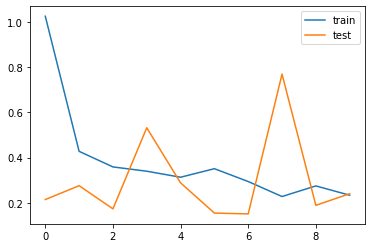

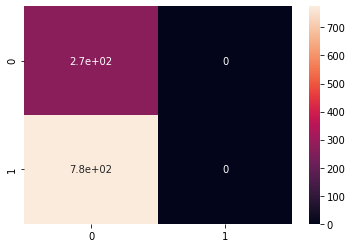

In [ ]:
cm(model,history)

# VGG16 
* VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. 

source - 'https://neurohive.io/en/popular-networks/vgg16/'

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16


In [ ]:
pre_trained_model = VGG16(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

# Plot vgg16


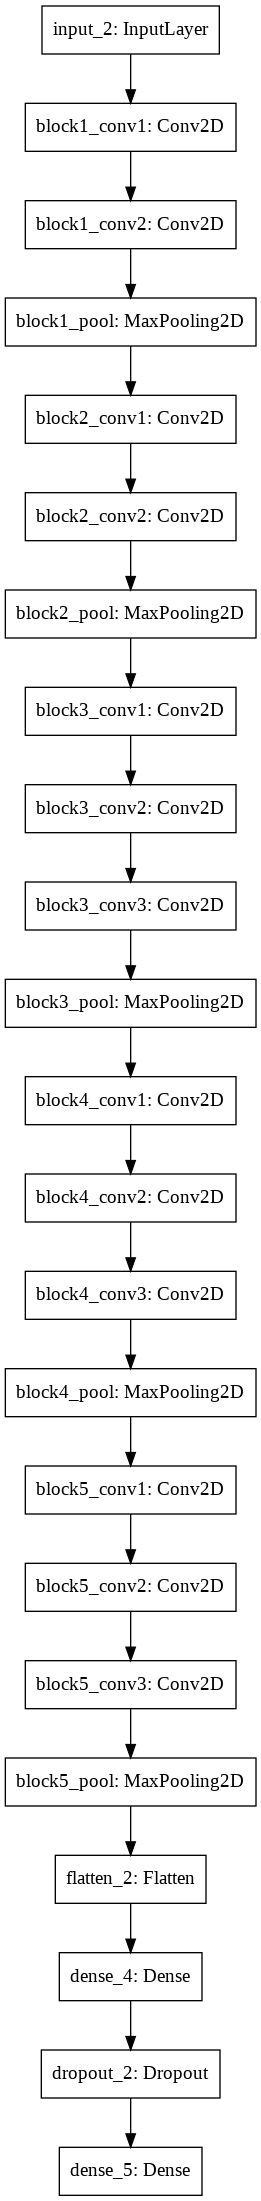

In [ ]:
plot(model,'vgg16.png')

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
  )

model.save_weights('vgg15.h5')

Epoch 1/10
125/125 [==============================] - 50s 404ms/step - loss: 0.2775 - acc: 0.8803 - val_loss: 0.2168 - val_acc: 0.9100
Epoch 2/10
125/125 [==============================] - 49s 396ms/step - loss: 0.1790 - acc: 0.9248 - val_loss: 0.1327 - val_acc: 0.9502
Epoch 3/10
125/125 [==============================] - 49s 396ms/step - loss: 0.1823 - acc: 0.9385 - val_loss: 0.2137 - val_acc: 0.9128
Epoch 4/10
125/125 [==============================] - 49s 390ms/step - loss: 0.1374 - acc: 0.9480 - val_loss: 0.1640 - val_acc: 0.9473
Epoch 5/10
125/125 [==============================] - 49s 393ms/step - loss: 0.1437 - acc: 0.9439 - val_loss: 0.3498 - val_acc: 0.8851
Epoch 6/10
125/125 [==============================] - 49s 389ms/step - loss: 0.1474 - acc: 0.9430 - val_loss: 0.1736 - val_acc: 0.9454
Epoch 7/10
125/125 [==============================] - 49s 390ms/step - loss: 0.1299 - acc: 0.9525 - val_loss: 0.2510 - val_acc: 0.9167
Epoch 8/10
125/125 [==============================] - 4

Accuracy =  0.9636015295982361


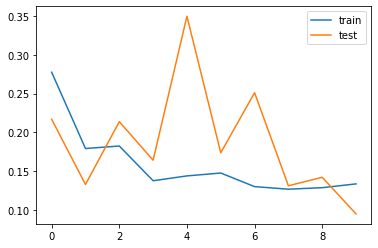

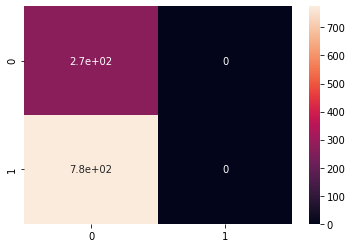

In [ ]:
cm(model,history)

# ResNet50

In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
pre_trained_model = ResNet50(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


In [ ]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

# Plot Resnet50

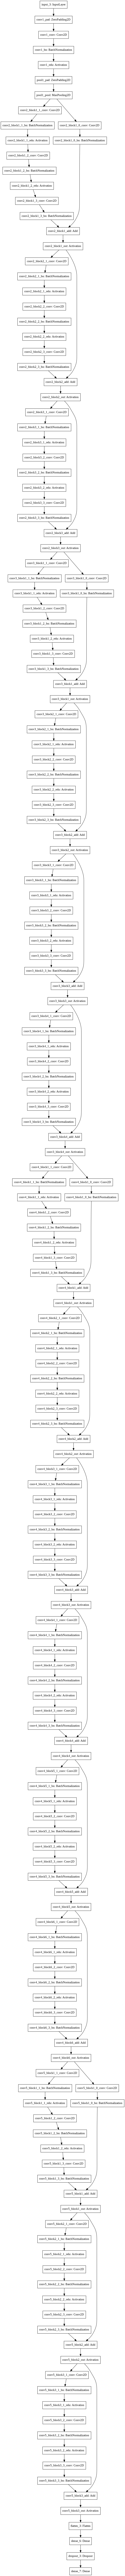

In [ ]:
plot(model,'resnet.png')

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
  )



Epoch 1/10
125/125 [==============================] - 51s 408ms/step - loss: 0.7289 - acc: 0.6890 - val_loss: 0.4673 - val_acc: 0.8228
Epoch 2/10
125/125 [==============================] - 50s 397ms/step - loss: 0.5241 - acc: 0.7555 - val_loss: 0.6283 - val_acc: 0.6609
Epoch 3/10
125/125 [==============================] - 50s 402ms/step - loss: 0.4761 - acc: 0.7715 - val_loss: 0.4169 - val_acc: 0.8352
Epoch 4/10
125/125 [==============================] - 51s 405ms/step - loss: 0.4469 - acc: 0.7836 - val_loss: 0.3385 - val_acc: 0.8420
Epoch 5/10
125/125 [==============================] - 50s 402ms/step - loss: 0.4189 - acc: 0.8040 - val_loss: 0.3741 - val_acc: 0.8506
Epoch 6/10
125/125 [==============================] - 49s 394ms/step - loss: 0.3957 - acc: 0.8121 - val_loss: 0.3615 - val_acc: 0.7960
Epoch 7/10
125/125 [==============================] - 49s 396ms/step - loss: 0.3859 - acc: 0.8175 - val_loss: 0.3186 - val_acc: 0.8352
Epoch 8/10
125/125 [==============================] - 5

In [ ]:
model.save_weights('resnet50.h5')

Accuracy =  0.8668582439422607


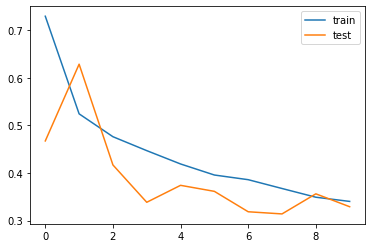

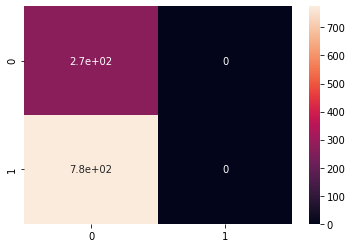

In [ ]:
cm(model,history)

In [ ]:
from google.colab import files
files.download('/content/vgg15.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/resnet50.h5')
files.download('/content/inception.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/vgg15.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import glob
import shutil
import os


count = 0 
jpg = []

src_dir = "/content/"
dst_dir = "/content/drive/My Drive/dataset/"
for jpgfile in glob.iglob(os.path.join(src_dir, "*.h5")):
    shutil.copy(jpgfile, dst_dir)
    print(jpg)
    jpg.append(jpgfile)
    count +=1


[]
['/content/cnn.h5']
['/content/cnn.h5', '/content/resnet50.h5']
['/content/cnn.h5', '/content/resnet50.h5', '/content/inception.h5']
